In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
!gdown "https://drive.google.com/uc?id=1CjhNulNquoA8gWQtmHD83ib5t8lGBGC1"

Downloading...
From (original): https://drive.google.com/uc?id=1CjhNulNquoA8gWQtmHD83ib5t8lGBGC1
From (redirected): https://drive.google.com/uc?id=1CjhNulNquoA8gWQtmHD83ib5t8lGBGC1&confirm=t&uuid=862b394a-2f40-4769-8ef2-7b13e9fc48a8
To: /content/animal_data.zip
100% 38.9M/38.9M [00:00<00:00, 110MB/s]


In [5]:
!unzip -o animal_data.zip -d ./unzipped_folder
!ls ./unzipped_folder

Archive:  animal_data.zip
   creating: ./unzipped_folder/animal_data/
  inflating: ./unzipped_folder/__MACOSX/._animal_data  
   creating: ./unzipped_folder/animal_data/Cat/
  inflating: ./unzipped_folder/__MACOSX/animal_data/._Cat  
   creating: ./unzipped_folder/animal_data/Dog/
  inflating: ./unzipped_folder/__MACOSX/animal_data/._Dog  
   creating: ./unzipped_folder/animal_data/Dolphin/
  inflating: ./unzipped_folder/__MACOSX/animal_data/._Dolphin  
   creating: ./unzipped_folder/animal_data/Giraffe/
  inflating: ./unzipped_folder/__MACOSX/animal_data/._Giraffe  
   creating: ./unzipped_folder/animal_data/Bear/
  inflating: ./unzipped_folder/__MACOSX/animal_data/._Bear  
   creating: ./unzipped_folder/animal_data/Zebra/
  inflating: ./unzipped_folder/__MACOSX/animal_data/._Zebra  
   creating: ./unzipped_folder/animal_data/Panda/
  inflating: ./unzipped_folder/__MACOSX/animal_data/._Panda  
   creating: ./unzipped_folder/animal_data/Tiger/
  inflating: ./unzipped_folder/__MACOSX/an

In [16]:
import os

data = []
path = "./unzipped_folder/animal_data"
extn = ('.jpeg', '.jpg', '.png')

for cat in os.listdir(path):
    cat_path = os.path.join(path, cat)
    if os.path.isdir(cat_path):
        for img in os.listdir(cat_path):
            if img.lower().endswith(extn):
                img_path = os.path.join(cat_path, img)
                data.append({'label': cat, 'image_path': img_path})

print(len(data))

1944


In [19]:
animal = pd.DataFrame(data)
animal.head()

,label,image_path
0,Dog,./unzipped_folder/animal_data/Dog/Dog_6_2.jpg
1,Dog,./unzipped_folder/animal_data/Dog/Dog_25.jpeg
2,Dog,./unzipped_folder/animal_data/Dog/Dog_25_4.jpg
3,Dog,./unzipped_folder/animal_data/Dog/Dog_3.jpeg
4,Dog,./unzipped_folder/animal_data/Dog/Dog_29.jpeg


In [21]:
print(animal.info())
print(animal.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       1944 non-null   object
 1   image_path  1944 non-null   object
dtypes: object(2)
memory usage: 30.5+ KB
None
       label                                         image_path
count   1944                                               1944
unique    15                                               1944
top     Bird  ./unzipped_folder/animal_data/Dolphin/Dolphin_...
freq     137                                                  1


In [30]:
def resize_img(img_path):
    img = Image.open(image_path).resize((128,128))
    return img

images_resized = []

for idx,item in animal.iterrows():
  image_path = item['image_path']
  label = item['label']
  img = resize_img(image_path)
  if img is not None:
    images_resized.append({'label':label,'image':img})

img1 = images_resized[1]['image']
img1.size

(128, 128)

In [32]:
def normalize_image(img):
    return np.array(img) / 255.0

img_preprocessed = [{'label': img['label'], 'image': normalize_image(img['image'])} for img in images_resized]
img_preprocessed[0]

{'label': 'Dog',
 'image': array([[[0.32156863, 0.29803922, 0.25098039],
         [0.32941176, 0.30196078, 0.26666667],
         [0.3254902 , 0.29411765, 0.27843137],
         ...,
         [0.15686275, 0.15686275, 0.15686275],
         [0.16078431, 0.16078431, 0.16078431],
         [0.16078431, 0.16078431, 0.16078431]],
 
        [[0.33333333, 0.30980392, 0.2627451 ],
         [0.33333333, 0.30588235, 0.27058824],
         [0.31764706, 0.29019608, 0.27058824],
         ...,
         [0.14901961, 0.14901961, 0.14901961],
         [0.15294118, 0.15294118, 0.15294118],
         [0.16470588, 0.16470588, 0.16470588]],
 
        [[0.34901961, 0.32156863, 0.28235294],
         [0.33333333, 0.30588235, 0.27058824],
         [0.30196078, 0.2745098 , 0.24705882],
         ...,
         [0.15294118, 0.15294118, 0.15294118],
         [0.14901961, 0.14901961, 0.14901961],
         [0.15686275, 0.15686275, 0.15686275]],
 
        ...,
 
        [[0.24313725, 0.40392157, 0.21568627],
         [0.329

In [36]:
from sklearn.preprocessing import LabelEncoder

labels = [item['label'] for item in img_preprocessed]
labelencoder = LabelEncoder()
labels_encoded = labelencoder.fit_transform(labels)

img_encoded = []

for idx, item in enumerate(img_preprocessed):
    img = item['image']
    label = labels_encoded[idx]
    img_encoded.append({'label': label, 'image': img})
dict(enumerate(labelencoder.classes_))

{0: 'Bear',
 1: 'Bird',
 2: 'Cat',
 3: 'Cow',
 4: 'Deer',
 5: 'Dog',
 6: 'Dolphin',
 7: 'Elephant',
 8: 'Giraffe',
 9: 'Horse',
 10: 'Kangaroo',
 11: 'Lion',
 12: 'Panda',
 13: 'Tiger',
 14: 'Zebra'}

In [38]:
from sklearn.model_selection import train_test_split

x = [item['image'] for item in img_encoded]
y = [item['label'] for item in img_encoded]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
len(x_train)

1555

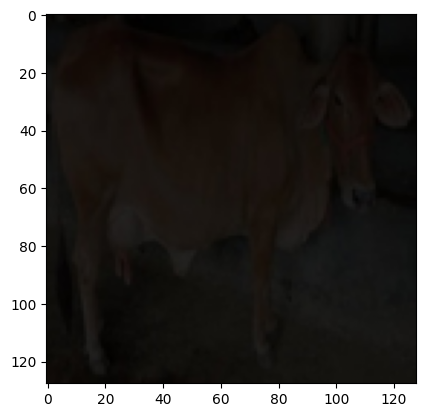

In [39]:
plt.imshow(x_train[0])

In [53]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base.trainable = False

x = base.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(labelencoder.classes_), activation='softmax')(x)

model = Model(inputs=base.input, outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13            │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 64, 64, 32)     │            864 │ input_layer_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 64, 64, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 64, 64, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 64, 64, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 64, 64, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 64, 64, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 64, 64, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 64, 64, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 64, 64, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 65, 65, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 32, 32, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,589,775 (9.88 MB)

 Trainable params: 331,791 (1.27 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

None


In [54]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - accuracy: 0.3394 - loss: 2.3340
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7700 - loss: 0.7674
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8469 - loss: 0.4993
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8679 - loss: 0.4004
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8981 - loss: 0.3206
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9121 - loss: 0.2657
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9293 - loss: 0.2478
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9412 - loss: 0.2174
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9397 - loss: 0.1951
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9489 - loss: 0.1735


In [55]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - accuracy: 0.8791 - loss: 0.4977
Test Accuracy: 0.8611825108528137


In [56]:
predictions = model.predict(x_test)
predictions[0]

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 208ms/step


array([1.9764931e-07, 2.9502229e-07, 9.0259675e-07, 9.2735281e-06,
       9.9935251e-01, 1.4048609e-07, 2.2349072e-08, 8.3750028e-06,
       1.3886143e-05, 1.6427317e-04, 8.8906796e-05, 3.3851355e-04,
       1.0513581e-06, 1.8519899e-05, 3.2222929e-06], dtype=float32)

In [57]:
mapping = {0: 'Bear', 1: 'Bird', 2: 'Cat', 3: 'Cow', 4: 'Deer', 5: 'Dog', 6: 'Dolphin',7: 'Elephant', 8: 'Giraffe', 9: 'Horse', 10: 'Kangaroo', 11: 'Lion', 12: 'Panda',13: 'Tiger', 14: 'Zebra'}

In [58]:
from google.colab import files
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Please upload an image.


Saving OIP.jpg to OIP (1).jpg


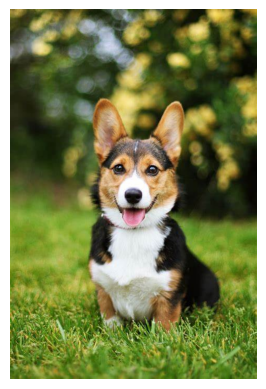

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Animal is: Dog


In [60]:
def preprocess_image(image_path):

    img = load_img(image_path, target_size=(128, 128))
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image():

    print("Please upload an image.")
    uploaded = files.upload()
    for image_name in uploaded.keys():
        img_path = image_name
        img = load_img(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        preprocessed_img = preprocess_image(img_path)
        prediction = model.predict(preprocessed_img)
        predicted_class = np.argmax(prediction)
        class_label = mapping[predicted_class]

        print(f"Animal is: {class_label}")


predict_image()

Please upload an image.


Saving Giant-pandas-scaled.jpg to Giant-pandas-scaled.jpg


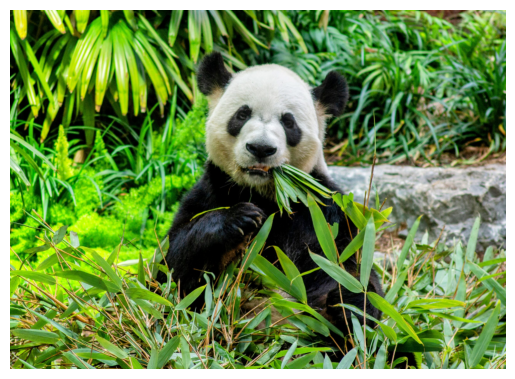

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Animal is: Panda


In [63]:
predict_image()

Please upload an image.


Saving OIP (2).jpg to OIP (2).jpg


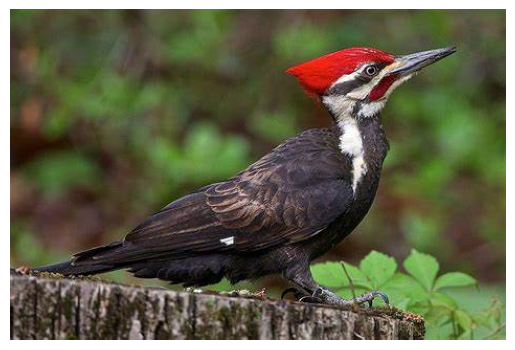

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Animal is: Bird


In [64]:
predict_image()

# **Thank You!**